# About Dataset :

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about: * Customers who left within the last month – the column is called Churn * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies * Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges * Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# To handle the data
import pandas as pd 
from scipy.stats import uniform, randint
import math

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN

#pipeline
from sklearn.pipeline import Pipeline

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset and show shape
df = pd.read_csv("Telco-Customer-Churn.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* By Using Info Function We Can See Count Of Columns And Rows DataType Of Data And Missing Values Also.In The Data 2 Columns Are of Int datatype And 1 Float Datatype And 18 Are Object Datatype .
* In The Data 7043 Rows And 21 Columns .
* In The Data 2 Columns Are of Int datatype 1 Column Float Datatype And 18 Columns Are Object Datatype .
* In The Data TotalCharges Column Is Float Datatype But It Show Object Datatype

In [4]:
# convert datatype for 'TotalCharges' 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
# drop missing values
df.dropna(inplace=True)

# drop customerID (Not useful for prediction)
df.drop('customerID', axis=1, inplace=True)

In [6]:
# Summary dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [7]:
# apply loop check unique value without int or float in dataset

for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [8]:
# Check missing values
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


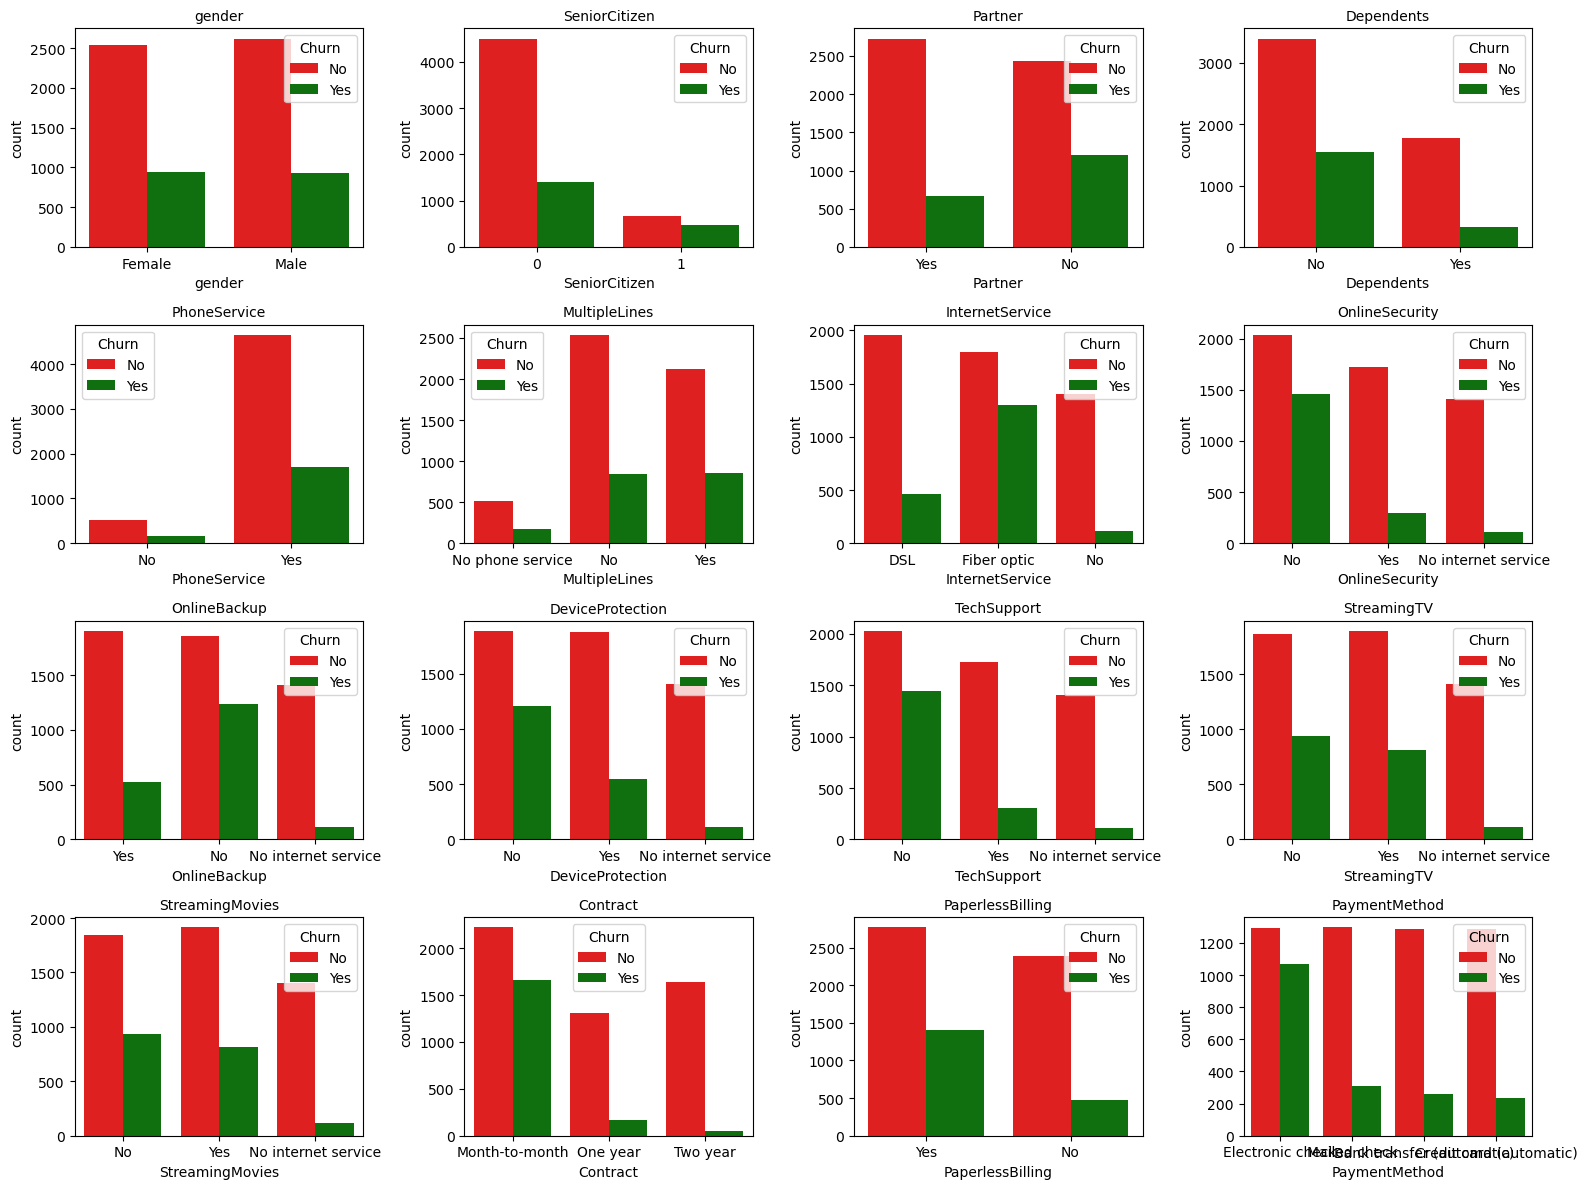

In [9]:
# define the predictors (categorical features) 
predictors = df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure']).columns

# Define colors for churn
colors= {'Yes': 'green', 'No': 'red'}

# Calculate number of rows and columns for subplots
n_cols= 4 
n_rows= math.ceil(len(predictors) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot each predictor
for i, predictor in enumerate(predictors):
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(predictor,fontsize=10)
    
# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


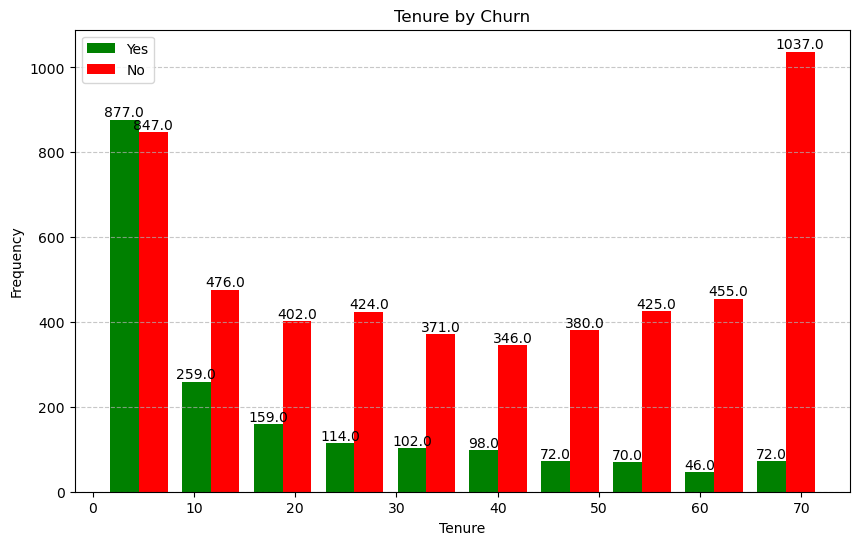

In [10]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10,6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['green', 'red'], label=['Yes', 'No'])
plt.title('Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle = '--', alpha=0.7)

# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va = 'bottom')

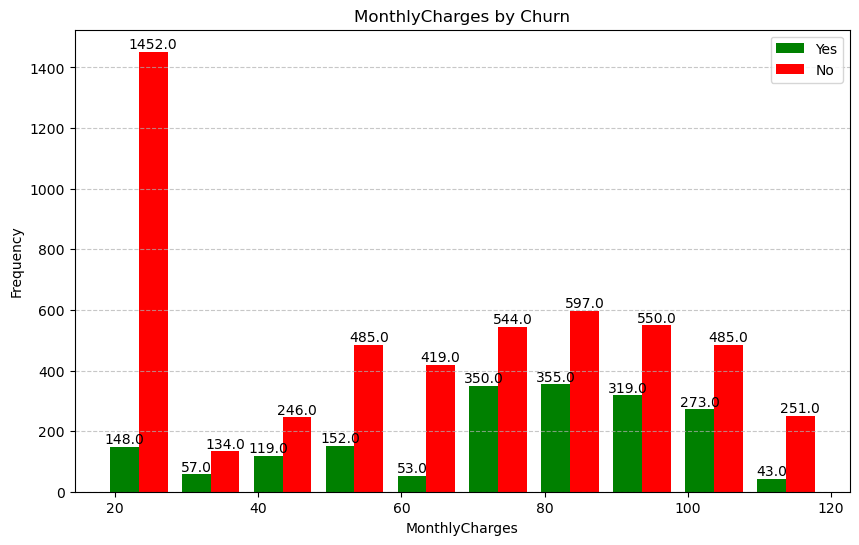

In [11]:
# Make plot for MonthlyCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10,6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['green', 'red'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle = '--', alpha=0.7)

# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va = 'bottom')


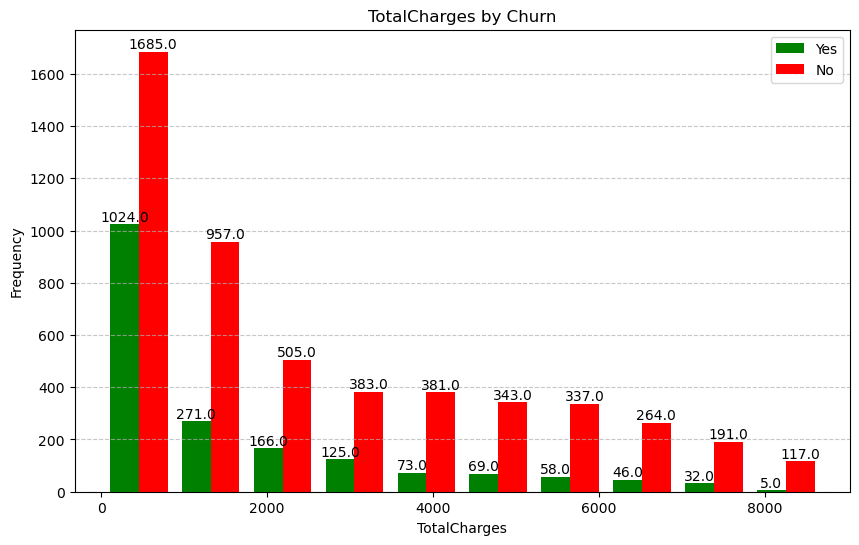

In [12]:
# make plot for TotalCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10,6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['green', 'red'], label=['Yes', 'No'])
plt.title('TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle = '--', alpha=0.7)

# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va = 'bottom')

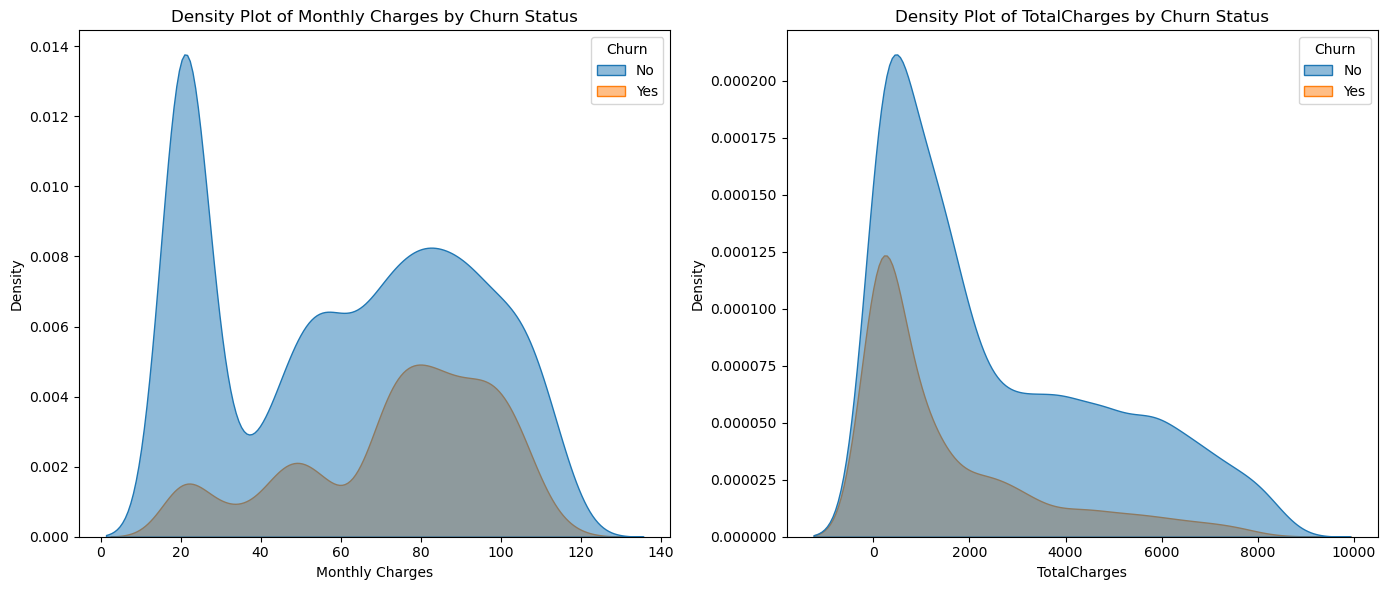

In [13]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize= (14,6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of TotalCharges by Churn Status')
axes[1].set_xlabel('TotalCharges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

**Conclusion :**
Customers With Lower Monthly Charge Are More Likely To Churn

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category','object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[categorical_cols])

#Create a Dataframe from the encoded data
encoded_df= pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [15]:
df.drop('Churn_No', axis=1, inplace=True)

In [16]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [17]:
# Rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [18]:
# split data into x and y
x= df.drop('Churn', axis=1)
y=df['Churn']

# Split the data into train and test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Initialie an empty list to store model scores 
model_scores= []

# Create a list of models to evaluate 
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
     ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])
    
    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(x_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(x_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})
    
    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy,2), "%")


Model: Random Forest
Test Accuracy: 0.795 %

Model: Gradient Boosting
Test Accuracy: 0.792 %

Model: Support Vector Machine
Test Accuracy: 0.731 %

Model: Logistic Regression
Test Accuracy: 0.73 %

Model: K-Nearest Neighbors
Test Accuracy: 0.753 %

Model: Decision Tree
Test Accuracy: 0.753 %

Model: Ada Boost
Test Accuracy: 0.786 %

Model: XG Boost
Test Accuracy: 0.787 %

Model: Naive Bayes
Test Accuracy: 0.684 %

Best Model:
Test Accuracy: 0.7953091684434968
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=42))]) with accuracy 0.8 %


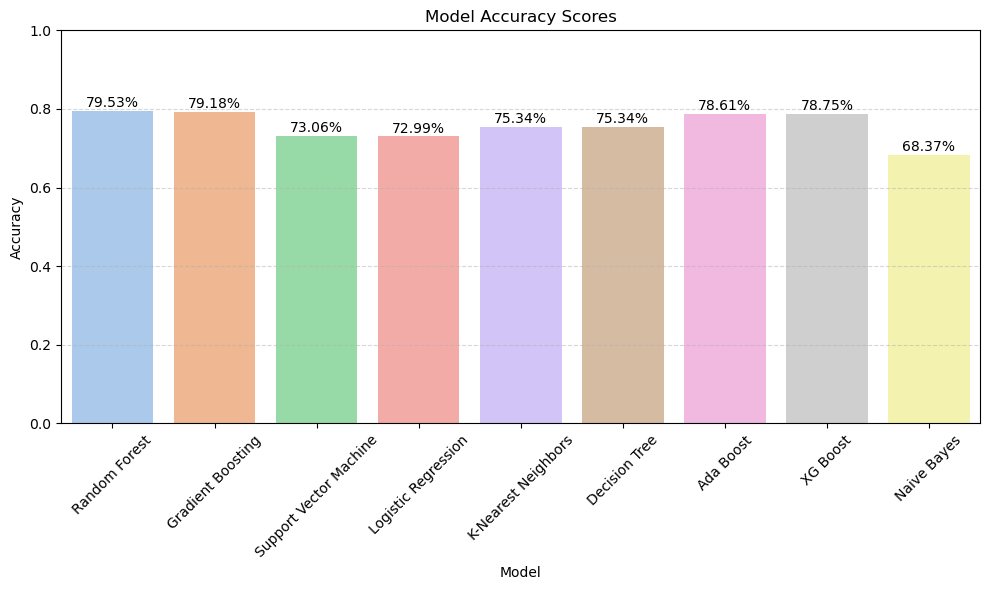

In [20]:
# Define a color palette for the bars
plt.figure(figsize=(10, 6))

# Simple pastel barplot
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette='pastel')

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.01, 
            f"{p.get_height():.2%}", ha='center')

# Formatting
plt.title("Model Accuracy Scores")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)   # accuracy between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [21]:
# UpSampling
sm = SMOTEENN()
x_res, y_res = sm.fit_resample(x, y)

xr_train, xr_test, yr_train, yr_test = train_test_split(x_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced', probability=True),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6), 
         'learning_rate': uniform(0.01, 0.2),  
         'n_estimators': randint(100, 300),  
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])
    
    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(xr_test)
    
     # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy,3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy, 2), "%")

Model: Random Forest
Test Accuracy: 0.941 %

Model: Gradient Boosting
Test Accuracy: 0.945 %

Model: Support Vector Machine
Test Accuracy: 0.988 %

Model: Logistic Regression
Test Accuracy: 0.901 %

Model: K-Nearest Neighbors
Test Accuracy: 0.975 %

Model: Decision Tree
Test Accuracy: 0.932 %

Model: Ada Boost
Test Accuracy: 0.932 %

Model: XG Boost
Test Accuracy: 0.948 %

Model: Naive Bayes
Test Accuracy: 0.864 %

Best Model:
Test Accuracy: 0.9879931389365352
Model Pipeline: SVC(C=10, class_weight='balanced', gamma='auto', probability=True,
    random_state=42) with accuracy 0.99 %


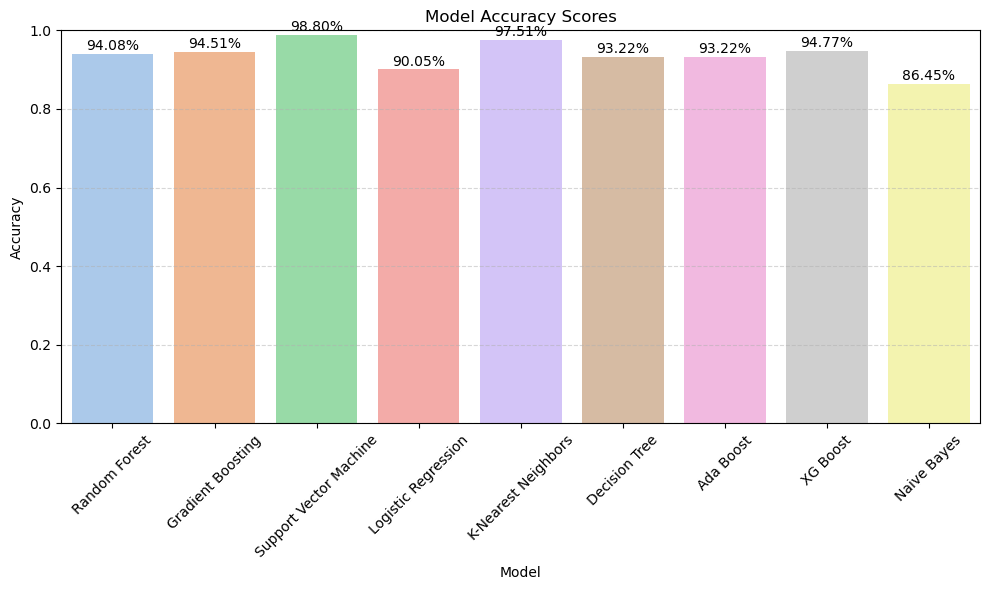

In [22]:
# Define a color palette for the bars
plt.figure(figsize=(10, 6))

# Simple pastel barplot
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette='pastel')

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.01, 
            f"{p.get_height():.2%}", ha='center')

# Formatting
plt.title("Model Accuracy Scores")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)   # accuracy between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [23]:
best_model.fit(xr_train, yr_train)
y_pred = best_model.predict(xr_test)
accuracy = accuracy_score(yr_test, y_pred)
print(accuracy)

0.9879931389365352


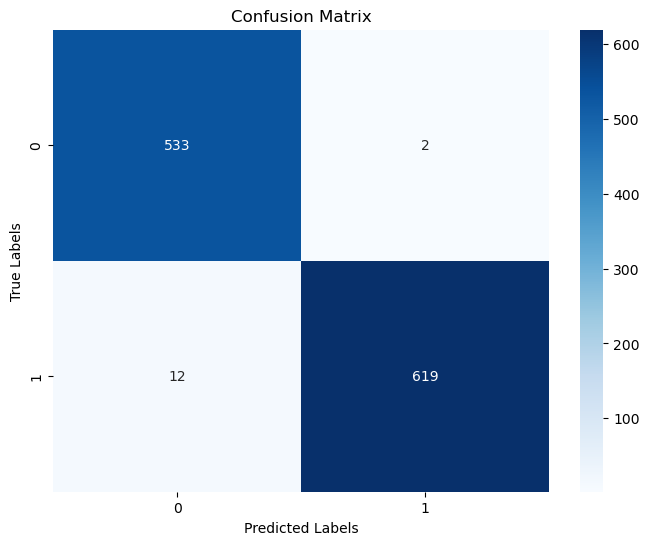

In [24]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print("Classification Report:\n", classification_report(yr_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       535
         1.0       1.00      0.98      0.99       631

    accuracy                           0.99      1166
   macro avg       0.99      0.99      0.99      1166
weighted avg       0.99      0.99      0.99      1166



In [26]:
import joblib

# Saving the best model
joblib.dump(best_model, "churn_model.pkl")
print("✅ Model saved as churn_model.pkl")

✅ Model saved as churn_model.pkl


In [28]:
# saving the model_features
joblib.dump(x.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [33]:
import pandas as pd
from io import StringIO

csv_data = """gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Prediction
Female,0,Yes,No,1,Yes,Fiber optic,Month-to-month,75.0,75.0,Churn
Male,0,No,No,36,Yes,DSL,One year,50.0,1800.0,No Churn
Female,1,No,Yes,2,No,No,Month-to-month,20.0,40.0,Churn
Male,1,Yes,Yes,60,Yes,Fiber optic,Two year,90.0,5400.0,No Churn
Female,0,Yes,No,12,Yes,DSL,Month-to-month,55.0,660.0,Churn
Male,0,No,No,24,Yes,No,One year,30.0,720.0,No Churn
"""

# Convert string CSV to DataFrame
df = pd.read_csv(StringIO(csv_data))
df.to_csv("test_case_churns.csv")
# Display DataFrame
print(df)



   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1          Yes   
1    Male              0      No         No      36          Yes   
2  Female              1      No        Yes       2           No   
3    Male              1     Yes        Yes      60          Yes   
4  Female              0     Yes         No      12          Yes   
5    Male              0      No         No      24          Yes   

  InternetService        Contract  MonthlyCharges  TotalCharges Prediction  
0     Fiber optic  Month-to-month            75.0          75.0      Churn  
1             DSL        One year            50.0        1800.0   No Churn  
2              No  Month-to-month            20.0          40.0      Churn  
3     Fiber optic        Two year            90.0        5400.0   No Churn  
4             DSL  Month-to-month            55.0         660.0      Churn  
5              No        One year            30.0         720